In [17]:
import random
import matplotlib.pyplot as plt

## Master Mind game code

Welcome to Binary MasterMind!
Guess the secret binary code of length 4. You have 10 attempts.
Secret Code (DEBUG): 0111
4/4 correct
Congratulations, you've guessed the secret code!


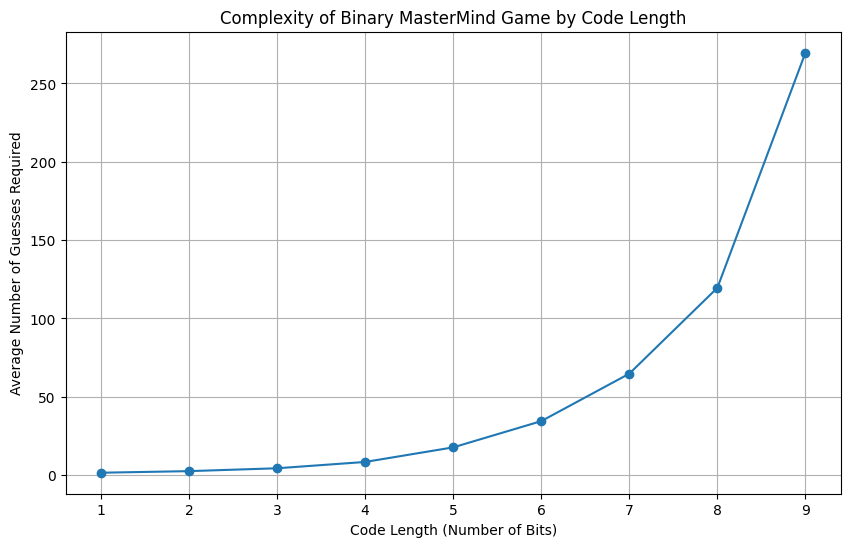

In [22]:
class MasterMind:
    def __init__(self, code_length=4):
        self.code_length = code_length
        self.secret_code = self.generate_secret_code()

    def generate_secret_code(self):
        return ''.join(random.choice('01') for _ in range(self.code_length))

    def evaluate_guess(self, guess):
        return sum(a == b for a, b in zip(self.secret_code, guess))

class GameFlow:
    def __init__(self, max_attempts=10, show_code=False):
        self.max_attempts = max_attempts
        self.show_code = show_code
        self.game = MasterMind()
        self.attempts = 0

    def start_game(self):
        print("Welcome to Binary MasterMind!")
        print(f"Guess the secret binary code of length {self.game.code_length}. You have {self.max_attempts} attempts.")

        if self.show_code:
            print(f"Secret Code (DEBUG): {self.game.secret_code}")

        while self.attempts < self.max_attempts:
            guess = input("Enter your guess: ")
            while len(guess) != self.game.code_length or not set(guess).issubset('01'):
                print("Invalid guess! Please enter a binary code of the correct length.")
                guess = input("Enter your guess: ")

            correct_bits = self.game.evaluate_guess(guess)
            print(f"{correct_bits}/{self.game.code_length} correct")

            if correct_bits == self.game.code_length:
                print("Congratulations, you've guessed the secret code!")
                return

            self.attempts += 1

        print("You've run out of attempts! Better luck next time!")
        print(f"The secret code was: {self.game.secret_code}")

def simulate_guessing(code_length, trials=100):
    total_guesses = 0

    for _ in range(trials):
        game = MasterMind(code_length)
        possible_guesses = [''.join(format(i, '0' + str(code_length) + 'b')) for i in range(2 ** code_length)]
        random.shuffle(possible_guesses)  # To simulate different starting conditions

        for guess_count, guess in enumerate(possible_guesses, 1):
            if game.evaluate_guess(guess) == code_length:
                total_guesses += guess_count
                break

    average_guesses = total_guesses / trials
    return average_guesses

def plot_complexity():
    code_lengths = list(range(1, 10)) #Change the range to plot for different code lengths
    average_guesses_data = [simulate_guessing(length) for length in code_lengths]

    plt.figure(figsize=(10, 6))
    plt.plot(code_lengths, average_guesses_data, marker='o')
    plt.xlabel('Code Length (Number of Bits)')
    plt.ylabel('Average Number of Guesses Required')
    plt.title('Complexity of Binary MasterMind Game by Code Length')
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    show_code = True  # Set to False for a normal game without debug information
    game_flow = GameFlow(max_attempts=10, show_code=show_code)
    game_flow.start_game()
    plot_decision = input("Would you like to see the complexity plot? (yes/no): ")
    if plot_decision.lower() == 'yes':
        plot_complexity()


# Quantum Binary MasterMind

## Introduction

This document describes the Quantum Binary MasterMind game, translating the classical game's mechanics into a quantum framework. It involves mapping binary guesses and the secret code into a quantum mechanical system using qubits, defining the game states, state vectors, and the quantum operations needed for the gameplay.

## System of Qubits

### Qubit Representation

Each binary digit (bit) in the code is represented by a qubit, which has two basis states:

- $|0\rangle$ for bit "0"
- $|1\rangle$ for bit "1"

### Code Length and Qubit Number

For a game with a code length of $n$, we utilize $n$ qubits. Each qubit state $|q_i\rangle$ (where $i$ ranges from 1 to $n$) can independently be in state $|0\rangle$ or $|1\rangle$.

## Game States

The overall state of the game is a tensor product of the state of each qubit. For a code of length $n$, the quantum state of a guess or the secret code is represented as:

$$|\psi\rangle = |q_1\rangle \otimes |q_2\rangle \otimes \dots \otimes |q_n\rangle$$

### State Vectors

For instance, if the secret code is "101" for a 3-bit game, the corresponding quantum state vector $|\psi\rangle$ is:

$$|\psi\rangle = |1\rangle \otimes |0\rangle \otimes |1\rangle = |101\rangle$$

This implies that the first qubit is in state $|1\rangle$, the second in $|0\rangle$, and the third in $|1\rangle$.

## Quantum Operations

### Guessing Operation

Quantum guessing might involve preparing a quantum state representing the guess, possibly using quantum gates to flip qubits.

### Evaluation Operation

The evaluation of guesses can be done through quantum measurement. Specific quantum operations could be designed to compare the guessed state with the secret state, utilizing properties like quantum interference or entanglement.

